## 포인터를 이용한 연결 리스트

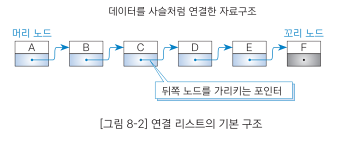

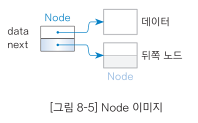

#### 실습 8-1

In [3]:
from typing import Any, Type

class Node:

    def __init__(self, data= None , next= None):
        self.data = data
        self.next = next

In [5]:
class LinkedList:

    def __init__(self) :
        self.no = 0 # 노드의 갯수
        self.head = None # 머리 노드에 대한 참조
        self.current = None # 현재 주목하고 있는 노드에 대한 참조
    
    def __len__(self) :
        return self.no

    def search(self, data):
        cnt = 0
        ptr = self.head
        while ptr is not None :
            if ptr.data == data:
                self.current = ptr
                return cnt
            cnt += 1
            ptr = ptr.next
        return -1
    
    def __contains__(self, data):
        # 이 함수를 구현함으로써 연결 리스트에 in 연산자를 적용할 수 있다.
        return self.search(data) >= 0
    
    def add_first(self, data) :

        ptr = self.head
        self.head = self.current = Node(data,ptr)
        self.no += 1

    def add_last(self, data):
        if self.head is None :
            self.add_first(data)
        else :
            ptr = self.head
            while ptr.next is not None :
                ptr = ptr.next
            ptr.next = self.current = Node(data, None)
            self.no += 1
    
    def remove_first(self):
        if self.head is not None :
            self.head = self.current = self.head.next
        self.no -= 1
    
    def remove_last(self):

        if self.head is not None :
            if self.head.next is None :
                self.remove_first()
            else:
                ptr = self.head
                pre = self.head

                while ptr.next is not None :
                    pre = ptr
                    ptr = ptr.next

                pre.next = None
                self.current = pre
                self.no -= 1
    
    def remove(self, p) :
        if self.head is not None :
            if p is self.head:
                self.remove_first()
            else:
                ptr = self.head

                while ptr.next is not p:
                    ptr = ptr.next
                    if ptr is None:
                        return
                    ptr.next = p.next
                    self.current = ptr
                    self.no -= 1
    
    def remove_current_node(self):
        self.remove(self.current)
    
    def clear(self):
        while self.head is not None :
            self.remove_first()
        self.current = None
        self.no = 0
    
    def next(self):
        if self.current is None or self.current.next is None :
            return False
        self.current = self.current.next
        return True
    
    def print_current_node(self):
        if self.current is None:
            print('주목노드가 존재하지 않습니다.')
        else:
            print(self.current.data)
    
    def print(self):
        ptr = self.head

        while ptr is not None:
            print(ptr.data)
            ptr = ptr.next
    
    def __iter__(self) :
        return LinkedListIterator(self.head)

In [6]:
class LinkedListIterator:

    def __init__(self, head):
        self.current = head
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.current is None:
            raise StopIteration
        else :
            data = self.current.data
            self.current = self.current.next
            return data

#### 실습 8-2

In [9]:
from enum import Enum

Menu = Enum('Menu', ['머리에노드삽입', '꼬리에노드삽입', '머리노드삭제',
                     '꼬리노드삭제', '주목노드출력', '주목노드이동',
                     '주목노드삭제', '모든노드삭제', '검색', '멤버십판단',
                     '모든노드출력', '스캔', '종료',])

def select_Menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep='  ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)


lst = LinkedList()  # 연결 리스트를 생성

while True:
    menu = select_Menu()  # 메뉴 선택

    if menu == Menu.머리에노드삽입:  # 맨 앞에 노드 삽입
        lst.add_first(int(input('머리에 넣을 값을 입력하세요.: ')))

    elif menu == Menu.꼬리에노드삽입:  # 맨 끝에 노드 삽입
        lst.add_last(int(input('꼬리에 넣을 값을 입력하세요.: ')))

    elif menu == Menu.머리노드삭제:  # 맨 앞 노드 삭제
        lst.remove_first()

    elif menu == Menu.꼬리노드삭제:  # 맨 끝 노드 삭제
        lst.remove_last()

    elif menu == Menu.주목노드출력:  # 주목 노드 출력
        lst.print_current_node()

    elif menu == Menu.주목노드이동:  # 주목 노드를 한 칸 뒤로 이동
        lst.next()

    elif menu == Menu.주목노드삭제:  # 주목 노드 삭제
        lst.remove_current_node()

    elif menu == Menu.모든노드삭제:  # 모든 노드를 삭제
        lst.clear()

    elif menu == Menu.검색:  # 노드를 검색
        pos = lst.search(int(input('검색할 값을 입력하세요.: ')))
        if pos >= 0:
            print(f'그 값의 데이터는 {pos + 1}번째에 있습니다.')
        else:
            print('해당 데이터가 없습니다.')

    elif menu == Menu.멤버십판단:  # 멤버십 판단
        print('그 값의 데이터는 포함되어' + (' 있습니다.' if int(input('멤버십 판단할 값을 입력하세요.: ')) in lst else ' 있지 않습니다.'))

    elif menu == Menu.모든노드출력:  # 모든 노드 출력
        lst.print()

    elif menu == Menu.스캔:  # 모든 노드 스캔
        for e in lst:
            print(e)

    else:  # 종료
        break

(1)머리에노드삽입  (2)꼬리에노드삽입  (3)머리노드삭제  (4)꼬리노드삭제  (5)주목노드출력  (6)주목노드이동  (7)주목노드삭제  (8)모든노드삭제  (9)검색  (10)멤버십판단  (11)모든노드출력  (12)스캔  (13)종료: 13
